# Exploratory Data Analysis - Forecasting Product Demand for Retailers
**Author:** Ryan Krabbe  
**Date:** 7/14/2025

**Objective:** Accurately forecast product demand using product features from a bakery distributor's data


## Imports
In the code cell below, import the necessary Python libraries for this notebook.  

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    BaggingClassifier,
    VotingClassifier,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures

## Section 1. Import and Inspect the Data

### 1.1 Load the dataset and display the first few rows

In [26]:
# Load the data
df = pd.read_csv("train_clean.csv")

# Display the first few rows
df.head()

,Week,Agency_ID,Channel_ID,Route_ID,Client_ID,Product_ID,Weekly_Units_Sold,Weekly_Sales_Price,Dev_uni_proxima,Dev_proxima,Unit_Demand
0,4,1441,1,5533,7701781,45111,4,35.92,0,0.0,4
1,6,2229,1,1101,312220,3270,7,73.29,0,0.0,7
2,7,1945,1,8013,877789,2425,15,67.50,0,0.0,15
3,6,2012,1,1159,7878703,1309,3,20.28,0,0.0,3
4,5,2054,1,1125,283175,47840,10,80.00,0,0.0,10


### 1.2 Check for missing values and display summary statistics

In [33]:
# Get a summary of the dataset
df.info()

# Check for any missing values
df.isnull().sum()

# Display summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Week                10000 non-null  int64  
 1   Agency_ID           10000 non-null  int64  
 2   Channel_ID          10000 non-null  int64  
 3   Route_ID            10000 non-null  int64  
 4   Client_ID           10000 non-null  int64  
 5   Product_ID          10000 non-null  int64  
 6   Weekly_Units_Sold   10000 non-null  int64  
 7   Weekly_Sales_Price  10000 non-null  float64
 8   Dev_uni_proxima     10000 non-null  int64  
 9   Dev_proxima         10000 non-null  float64
 10  Unit_Demand         10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


,Week,Agency_ID,Channel_ID,Route_ID,Client_ID,Product_ID,Weekly_Units_Sold,Weekly_Sales_Price,Dev_uni_proxima,Dev_proxima,Unit_Demand
count,10000.000000,10000.000000,10000.00000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.913500,2590.557400,1.37590,2110.096600,1.810038e+06,20681.211400,7.157600,69.042987,0.137200,1.365616,7.065200
std,2.023864,4181.264893,1.43903,1501.680689,1.856779e+06,18671.464626,21.009453,374.385980,2.760894,21.629168,20.676927
min,3.000000,1110.000000,1.00000,9.000000,2.103000e+03,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1312.000000,1.00000,1160.000000,3.564202e+05,1242.000000,2.000000,16.760000,0.000000,0.000000,2.000000
50%,6.000000,1614.000000,1.00000,1276.000000,1.203460e+06,30532.000000,3.000000,30.000000,0.000000,0.000000,3.000000
75%,8.000000,2038.000000,1.00000,2802.000000,2.380932e+06,37361.000000,6.000000,55.840000,0.000000,0.000000,6.000000
max,9.000000,25759.000000,11.00000,9824.000000,9.829637e+06,49973.000000,897.000000,19470.080000,200.000000,1500.120000,897.000000


## Section 2. Data Exploration and Preparation

### 2.1 Explore data patterns and distributions

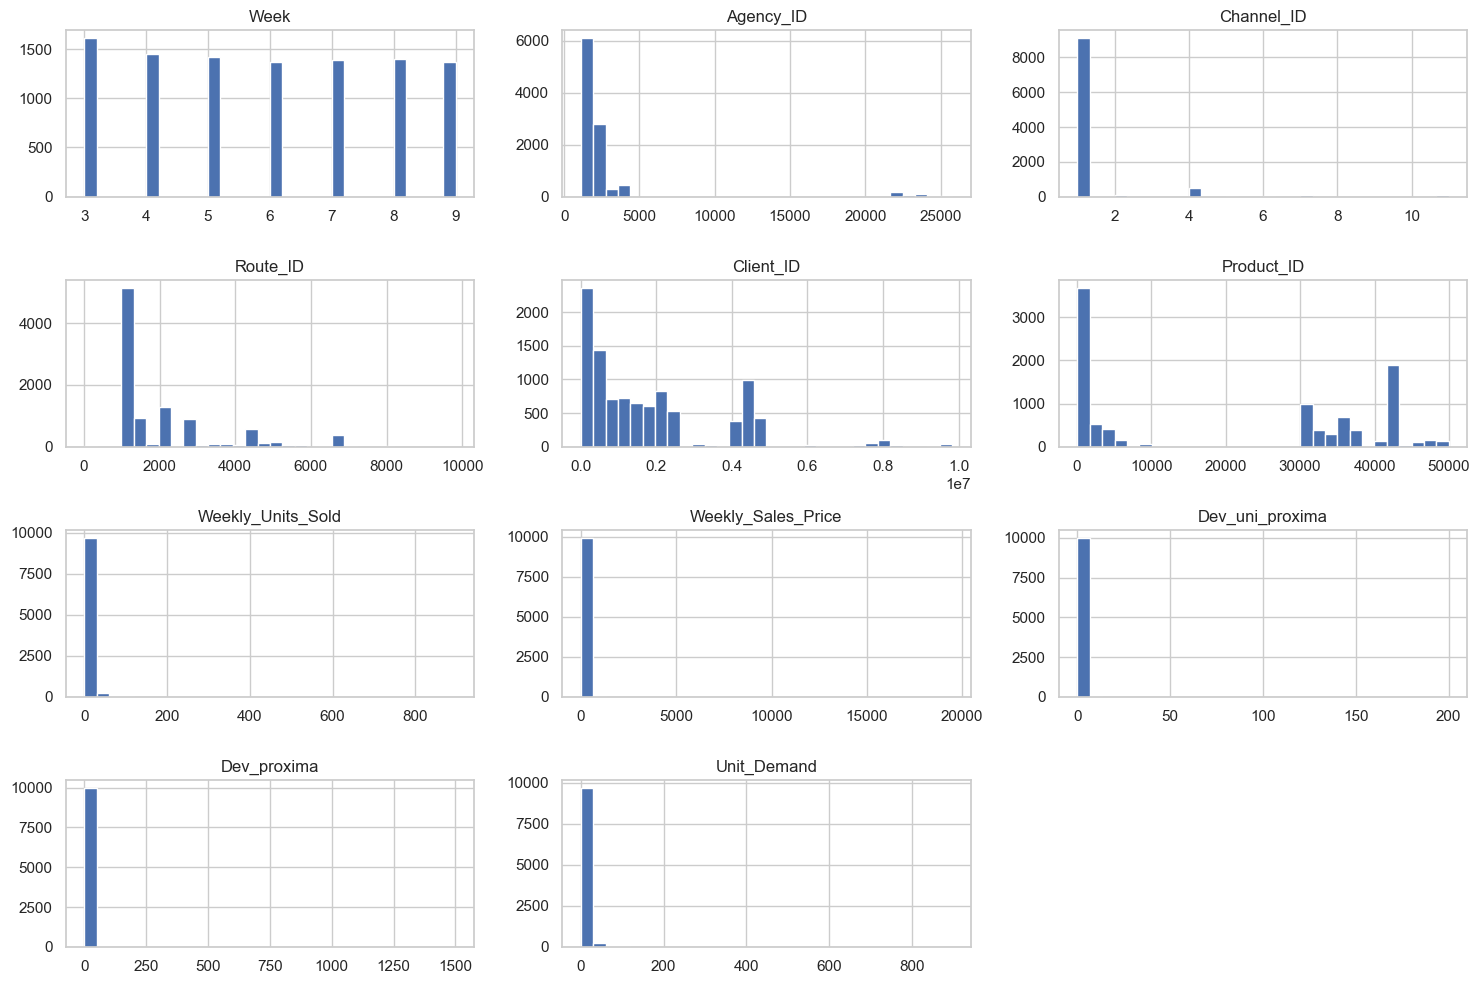

In [39]:
# Histogram of numerical features
df.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

In [44]:
# Unique value counts
df['Agency_ID'].nunique(), df['Client_ID'].nunique(), df['Product_ID'].nunique()

(446, 9875, 530)

Text(0.5, 1.0, 'Top 10 Most Frequent Products')

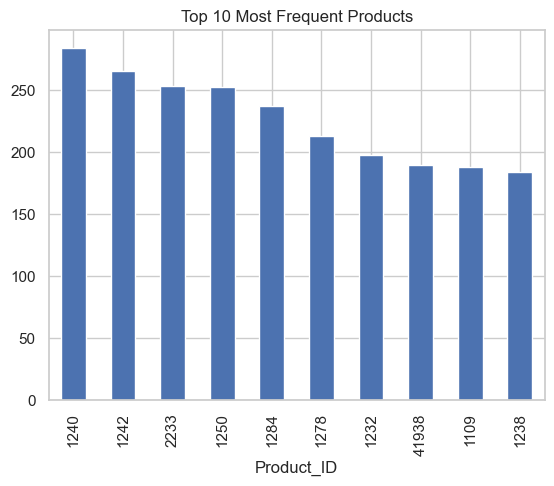

In [48]:
# Top 10 products by frequency
df['Product_ID'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Most Frequent Products")

Text(0.5, 1.0, 'Correlation Matrix')

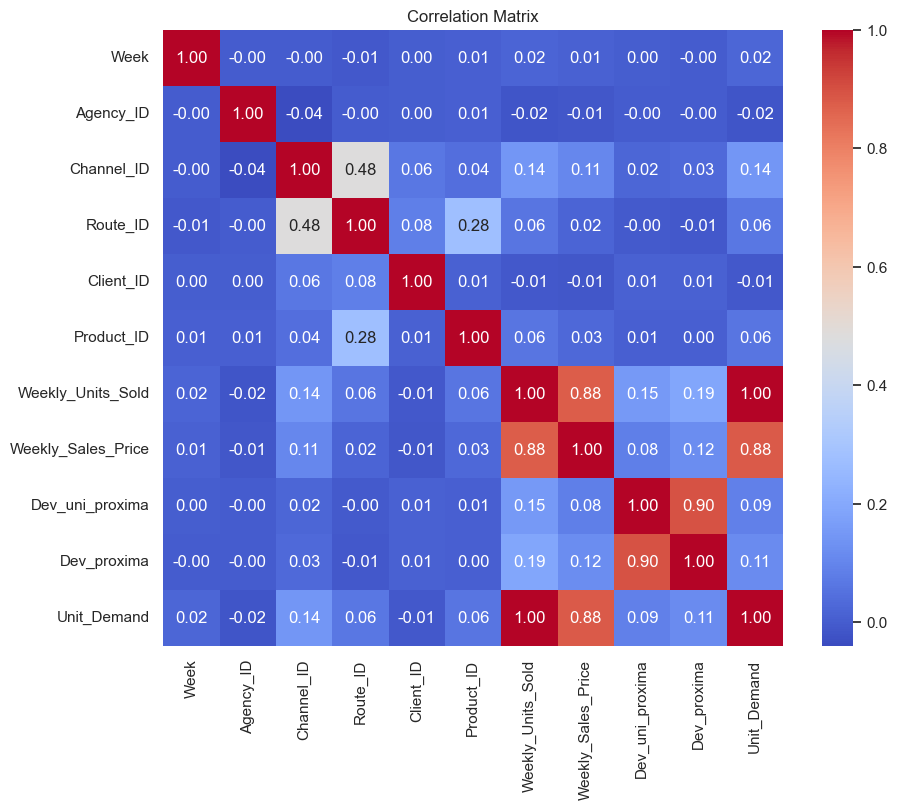

In [51]:
# Correlation matrix
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")

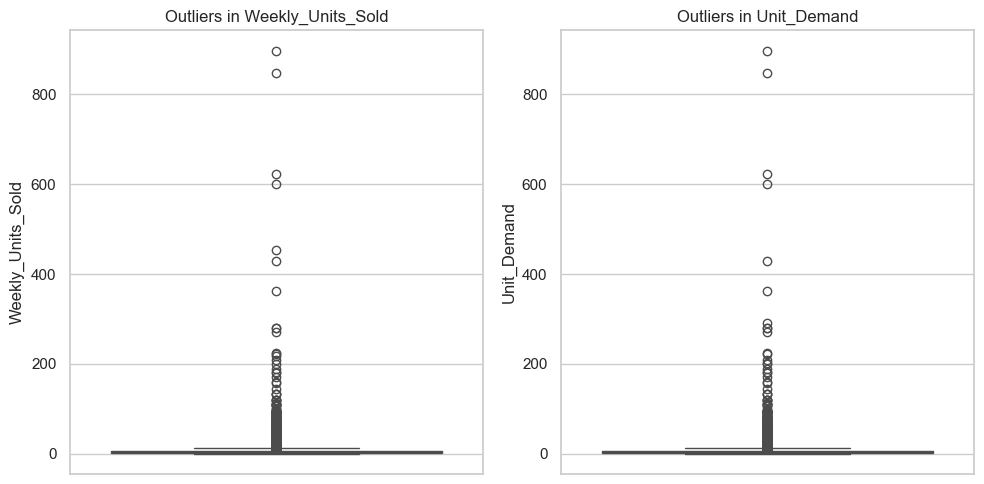

In [53]:
# Use box plots to detect outliers

# Set style
sns.set(style="whitegrid")

# Plot boxplots
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df["Weekly_Units_Sold"])
plt.title("Outliers in Weekly_Units_Sold")

plt.subplot(1, 2, 2)
sns.boxplot(y=df["Unit_Demand"])
plt.title("Outliers in Unit_Demand")

plt.tight_layout()
plt.show()